In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sys
import os

import neural_net
print(os.getcwd())
%pylab inline

/Users/nd/projects/pml-neuralnet-hw/PML-DNN-hw1/neural_net
Populating the interactive namespace from numpy and matplotlib


## Regression - homework

In [3]:
dropbox_path = '/Users/nd/projects/pml-neuralnet-hw/PersonalizedML/'
filename = 'parkinsons_supervised.csv'

In [4]:
# Set the hyperparameters
layer_sizes = [128,32]
batch_size = 25
learning_rate = .001
dropout_prob = 1.0
weight_penalty = 0.0
clip_gradients = False

In [5]:
reload(neural_net)
neural_net.reload_files()

In [9]:
net = neural_net.NeuralNetwork(dropbox_path + filename, 'homework', 
                               layer_sizes, batch_size, learning_rate, dropout_prob, 
                               weight_penalty, clip_gradients, model_type='regression')

Original data length was 5875
After dropping rows with nan in any label column, length is 5875
3581 rows in training data
1167 rows in validation data
1127 rows in testing data

Performing regression.
Input dimensions (number of features): 20
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('20x128', '128'), ('128x32', '32'), ('32x2', '2')]


In [ ]:
#find good hyperparameters for the base set

layer_size_cands = [[128,32],[128,64],[128,128],[128,64,32],[128,64,64]]

rmse_results = []

for i in range(0,len(layer_size_cands)):
    layer_sizes = layer_size_cands[i]
    batch_size = 25
    learning_rate = .001
    dropout_prob = 1.0
    weight_penalty = 0.0
    clip_gradients = False
    print('this is iteration ' + str(i) + ' !!!!!')
    
    
    net = neural_net.NeuralNetwork(dropbox_path + filename, 'homework', 
                               layer_sizes, batch_size, learning_rate, dropout_prob, 
                               weight_penalty, clip_gradients, model_type='regression')
    
    
    
    net.train(num_steps=10000, output_every_nth=100)
    rmse_results.append(net.test_on_validation())

print rmse_results    

this is iteration 0 !!!!!
Original data length was 5875
After dropping rows with nan in any label column, length is 5875
3581 rows in training data
1167 rows in validation data
1127 rows in testing data

Performing regression.
Input dimensions (number of features): 20
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('20x128', '128'), ('128x32', '32'), ('32x2', '2')]
Training iteration 0
	 Training RMSE 30.094
	 Validation RMSE 26.9931
	 Loss 26.9931
Training iteration 100
	 Training RMSE 11.419
	 Validation RMSE 11.0586
	 Loss 11.0586
Training iteration 200
	 Training RMSE 9.2407
	 Validation RMSE 9.0418
	 Loss 9.0418
Training iteration 300
	 Training RMSE 6.73745
	 Validation RMSE 8.52351
	 Loss 8.52351
Training iteration 400
	 Training RMSE 6.47328
	 Validation RMSE 8.10882
	 Loss 8.10882
Training iteration 500
	 Training RMSE 8.14462
	 Validation RMSE 7.76996
	 Loss 7.76996
Training iteration 600
	 Training RMSE 8.

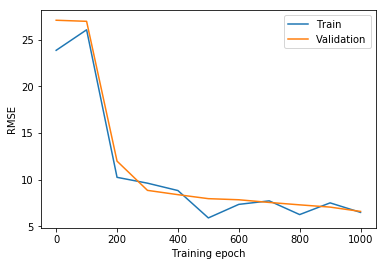

In [13]:
net.plot_training_progress()

### debugging neural network using session.run

In [14]:
X, Y = net.data_loader.get_train_batch(10)
feed_dict = {net.tf_X: X,
             net.tf_Y: Y,
             net.tf_dropout_prob: 1.0}
print "X", np.shape(X), "Y", np.shape(Y)

X (10, 20) Y (10, 2)


In [19]:
print net.session.run([net.tf_X,net.tf_Y, net.logits], feed_dict=feed_dict)
#print "X", np.shape(tf_X), "Y", np.shape(tf_Y), "logits", np.shape(logits)

[array([[ 0.35033551, -1.78116202, -0.68470937, -1.40052152, -0.30320659,
        -0.1525038 , -0.25575474, -0.20323569, -0.25678062,  0.96460992,
         0.52912575,  0.97140121,  1.18462873,  0.82155502,  0.97114718,
        -0.20225847, -0.40879247,  1.4391408 ,  0.14954013, -0.16320474],
       [-0.62218499, -0.76638234,  1.46047366,  0.49315697, -0.65916598,
        -0.88036144, -0.54216307, -0.54065609, -0.54115933, -0.91260463,
        -0.95570928, -0.86152756, -0.82540822, -0.99184608, -0.86126816,
        -0.48749965,  1.05310428, -2.19696879,  0.07246424, -1.14588571],
       [ 0.4313789 , -0.87913561,  1.46047366, -1.33126593, -0.18627307,
        -0.4621276 , -0.04247193, -0.14307547, -0.0434966 ,  0.47931957,
         0.38813251,  0.52619565,  0.54269242,  0.58743757,  0.52594227,
        -0.46723726,  0.82877713, -1.87455714,  1.49147642, -0.31518951],
       [-0.70322841,  0.92491704,  1.46047366, -0.54672247, -0.43217739,
        -0.71460325, -0.29841128, -0.35755974, 

In [18]:
# To see the tensorflow model you've built in tensorboard, run the following
journalist = tf.summary.FileWriter(net.checkpoint_dir, graph=net.session.graph)
journalist.flush()

# Now enter the following command at the command line
# > tensorboard --logdir 'saved_models'
# (you may need to replace 'saved_models' with the path to the actual 
# net.checkpoint_dir you are using)